In [16]:
import pandas as pd

df = pd.read_csv('./price.csv',index_col=['stock_id','date'],parse_dates=['date'])


In [3]:
df.loc['0050']['收盤價']

date
2007-01-02     58.45
2007-01-03     58.70
2007-01-04     58.65
2007-01-05     57.90
2007-01-08     57.05
               ...  
2024-10-29    191.50
2024-10-30    191.80
2024-11-01    190.50
2024-11-04    192.95
2024-11-05    193.65
Name: 收盤價, Length: 1027, dtype: object

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='date'>

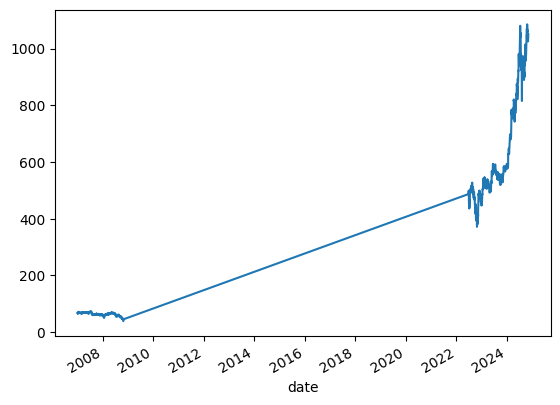

In [5]:
close = df.loc['2330']['收盤價']
close = pd.to_numeric(close,downcast='float',errors='coerce')
close.plot()

<Axes: xlabel='date'>

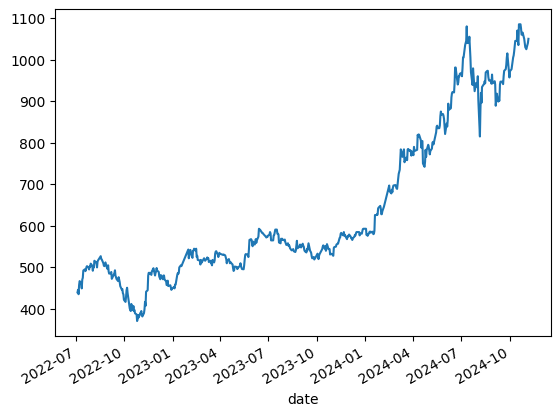

In [6]:
close['2022-07-04':].plot()

In [7]:
df.loc[df['證券名稱']=='台積電']

證券名稱      成交股數   成交筆數         成交金額      開盤價      最高價  \
stock_id date                                                              
2330     2007-01-02  台積電  26080400   5926   1768131919    67.80    68.00   
         2007-01-03  台積電  42087489   9192   2875024398    67.80    68.70   
         2007-01-04  台積電  22326516   4730   1514454033    67.70    68.10   
         2007-01-05  台積電  30580105   6208   2048997239    67.50    67.70   
         2007-01-08  台積電  24177966   5793   1595029837    66.10    66.50   
...                  ...       ...    ...          ...      ...      ...   
         2024-10-29  台積電  48097705  93617  49680152085  1035.00  1040.00   
         2024-10-30  台積電  40765247  46750  42368799669  1040.00  1055.00   
         2024-11-01  台積電  61545741  77404  62269386415   996.00  1030.00   
         2024-11-04  台積電  28225506  33492  29263376605  1030.00  1045.00   
         2024-11-05  台積電  33407780  28872  34851674542  1030.00  1055.00   

                         最低價      收盤價 漲跌(+/-)  漲跌價差   最後揭示買價  最後揭示買量   最後揭示賣價  \
stock_id date                                                                   
2330     2007-01-02    67.30    67.70       +   0.2    67.70   123.0    67.80   
         2007-01-03    67.50    68.00       +   0.3    68.00  1313.0    68.10   
         2007-01-04    67.60    67.70       -   0.3    67.70    28.0    67.80   
         2007-01-05    66.50    66.90       -   0.8    66.80    86.0    66.90   
         2007-01-08    65.70    65.80       -   1.1    65.80    70.0    65.90   
...                      ...      ...     ...   ...      ...     ...      ...   
         2024-10-29  1020.00  1040.00       -  10.0  1035.00   268.0  1040.00   
         2024-10-30  1030.00  1030.00       -  10.0  1030.00   870.0  1035.00   
         2024-11-01   996.00  1025.00       -   5.0  1020.00  1312.0  1025.00   
         2024-11-04  1025.00  1040.00       +  15.0  1040.00   551.0  1045.00   
         2024-11-05  1030.00  1050.00       +  10.0  1045.00   103.0  1050.00   

                     最後揭示賣量    本益比  
stock_id date                       
2330     2007-01-02   195.0  13.15  
         2007-01-03     2.0  13.20  
         2007-01-04     3.0  13.15  
         2007-01-05   230.0  12.99  
         2007-01-08  2693.0  12.78  
...                     ...    ...  
         2024-10-29    36.0  29.21  
         2024-10-30   938.0  28.93  
         2024-11-01   343.0  28.79  
         2024-11-04  1253.0  29.21  
         2024-11-05  1491.0  29.49  

[1027 rows x 15 columns]

# 每天開盤買入台積電，尾盤賣出，是賺還是賠？

In [17]:
df = df.loc['2330']
#df

In [18]:
df = df.rename(columns={
    '開盤價':'open',
    '最高價':'high',
    '最低價':'low',
    '收盤價':'close',
    '成交金額':'volume'
})
#df

In [19]:
df = df[['open','high','low','close','volume']]
#df

In [20]:
df = df.loc[df['volume']>0]
#df

In [21]:
df = df.apply(pd.to_numeric,errors='coerce')
#df

In [22]:
df['earn'] = 0
df['earn'] = df['close']-df['open']
df

,open,high,low,close,volume,earn
date,,,,,,
2007-01-02,67.8,68.0,67.3,67.7,1768131919,-0.1
2007-01-03,67.8,68.7,67.5,68.0,2875024398,0.2
2007-01-04,67.7,68.1,67.6,67.7,1514454033,0.0
2007-01-05,67.5,67.7,66.5,66.9,2048997239,-0.6
2007-01-08,66.1,66.5,65.7,65.8,1595029837,-0.3
...,...,...,...,...,...,...
2024-10-29,1035.0,1040.0,1020.0,1040.0,49680152085,5.0
2024-10-30,1040.0,1055.0,1030.0,1030.0,42368799669,-10.0
2024-11-01,996.0,1030.0,996.0,1025.0,62269386415,29.0


In [23]:
df['all_earn'] = (df['earn']*1000).cumsum()

<Axes: xlabel='date'>

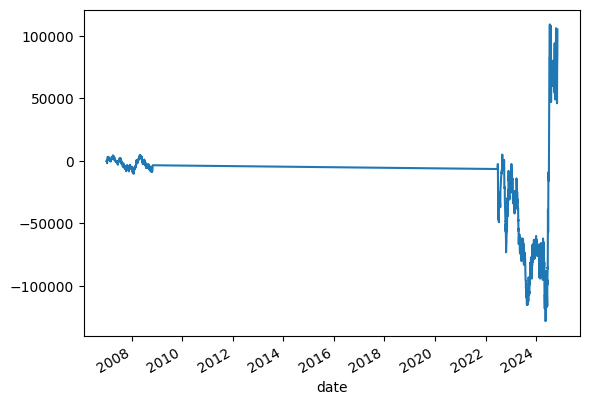

In [25]:
df['all_earn'].plot()

In [26]:
df

,open,high,low,close,volume,earn,all_earn
date,,,,,,,
2007-01-02,67.8,68.0,67.3,67.7,1768131919,-0.1,-100.0
2007-01-03,67.8,68.7,67.5,68.0,2875024398,0.2,100.0
2007-01-04,67.7,68.1,67.6,67.7,1514454033,0.0,100.0
2007-01-05,67.5,67.7,66.5,66.9,2048997239,-0.6,-500.0
2007-01-08,66.1,66.5,65.7,65.8,1595029837,-0.3,-800.0
...,...,...,...,...,...,...,...
2024-10-29,1035.0,1040.0,1020.0,1040.0,49680152085,5.0,55950.0
2024-10-30,1040.0,1055.0,1030.0,1030.0,42368799669,-10.0,45950.0
2024-11-01,996.0,1030.0,996.0,1025.0,62269386415,29.0,74950.0
